import library

In [3]:
import sys
sys.path.append("../../..")
# sys.path.append("../../../data/"

In [4]:
import kaos
import pandas as pd
from Bio import SeqIO
from collections import Counter
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import utility
import ruptures as rpt
import numpy as np

In [5]:
kmer_length =10
file_path_Ecoli = "../../../data/GCF_000005845.2_ASM584v2_genomic.fna"
file_path_yeast = "../../../data/w303_vlte.fasta"
file_path_covid = "../../../data/GCF_009858895.2_ASM985889v3_genomic.fna"

In [6]:
# import kaos
# kmer_length =10
# file_path_Ecoli = "../../../data/GCF_000005845.2_ASM584v2_genomic.fna"
# fcgr_sequence_Ecoli = kaos.chaos_frequency_dictionary(fasta_string= kaos.read_fasta(file_path_Ecoli), kmer_length=kmer_length, pseudo_count=True, chaos_game_kmer_array=kaos.chaos_game_representation_key(kmer_length = kmer_length))

In [7]:

# Function to calculate unique, distinct, and total k-mers
def count_kmers(sequence, k):
    # Generate all k-mers
    kmers = [str(sequence[i:i+k]) for i in range(len(sequence) - k + 1)]
    
    # Count all k-mers
    kmer_counts = Counter(kmers)
    
    # Calculate total k-mers (including duplicates)
    total_kmers = sum(kmer_counts.values())
    
    # Calculate distinct k-mers (unique types, ignoring duplicates)
    distinct_kmers = len(kmer_counts)
    
    # Calculate unique k-mers (k-mers that appear only once)
    unique_kmers = sum(1 for count in kmer_counts.values() if count == 1)
    
    return unique_kmers, distinct_kmers, total_kmers

##### Analysis 

In [8]:
def kmer_wise_result(fasta_path):

    import numpy as np

    sequence = kaos.read_fasta(fasta_path)
    c = 0
    result = pd.DataFrame(columns = ["kmer length", "distinct_kmers","unique_kmers", "total_kmers", "first", "second"])
    for i in range(1,22,1):
        print("Completed for kmer length : ", i)
        result.loc[c, "kmer length"] = i

        result.loc[c, ["unique_kmers", "distinct_kmers", "total_kmers"]] = count_kmers(sequence, i)

        c = c + 1

    result.replace([np.inf, -np.inf], np.nan, inplace=True)


    return result



##### Prepare result of $\it{E.coli}$

In [9]:
result_df_ecoli = kmer_wise_result(fasta_path = file_path_Ecoli)

Completed for kmer length :  1
Completed for kmer length :  2
Completed for kmer length :  3
Completed for kmer length :  4
Completed for kmer length :  5
Completed for kmer length :  6
Completed for kmer length :  7
Completed for kmer length :  8
Completed for kmer length :  9
Completed for kmer length :  10
Completed for kmer length :  11
Completed for kmer length :  12
Completed for kmer length :  13
Completed for kmer length :  14
Completed for kmer length :  15
Completed for kmer length :  16
Completed for kmer length :  17
Completed for kmer length :  18
Completed for kmer length :  19
Completed for kmer length :  20
Completed for kmer length :  21


In [10]:
result_df_ecoli

,kmer length,distinct_kmers,unique_kmers,total_kmers,first,second
0,1,4,0,4641652,NaN,NaN
1,2,16,0,4641651,NaN,NaN
2,3,64,0,4641650,NaN,NaN
3,4,256,0,4641649,NaN,NaN
4,5,1024,0,4641648,NaN,NaN
5,6,4096,0,4641647,NaN,NaN
6,7,16383,3,4641646,NaN,NaN
7,8,65360,259,4641645,NaN,NaN
8,9,256527,6733,4641644,NaN,NaN
9,10,898115,160755,4641643,NaN,NaN


##### Prepare result of yeast

In [11]:
result_df_yeast = kmer_wise_result(fasta_path = file_path_yeast)

Completed for kmer length :  1
Completed for kmer length :  2
Completed for kmer length :  3
Completed for kmer length :  4
Completed for kmer length :  5
Completed for kmer length :  6
Completed for kmer length :  7
Completed for kmer length :  8
Completed for kmer length :  9
Completed for kmer length :  10
Completed for kmer length :  11
Completed for kmer length :  12
Completed for kmer length :  13
Completed for kmer length :  14
Completed for kmer length :  15
Completed for kmer length :  16
Completed for kmer length :  17
Completed for kmer length :  18
Completed for kmer length :  19
Completed for kmer length :  20
Completed for kmer length :  21


In [12]:
result_df_yeast

,kmer length,distinct_kmers,unique_kmers,total_kmers,first,second
0,1,4,0,12165785,NaN,NaN
1,2,16,0,12165784,NaN,NaN
2,3,64,0,12165783,NaN,NaN
3,4,256,0,12165782,NaN,NaN
4,5,1024,0,12165781,NaN,NaN
5,6,4096,0,12165780,NaN,NaN
6,7,16384,0,12165779,NaN,NaN
7,8,65536,0,12165778,NaN,NaN
8,9,262050,382,12165777,NaN,NaN
9,10,1017379,61028,12165776,NaN,NaN


In [13]:
def return_plot(data, ax):

    # data

    ax = sns.lineplot(data, x = "kmer length", y = "distinct_kmers", ax=ax, lw = 0.5, c = "red", marker='o', markersize=2)
    signal = np.array(data["distinct_kmers"])
    model = rpt.Binseg(model="l2").fit(signal)
    breaks = model.predict(n_bkps=2) 
    print(breaks)
    ax = utility.custom_figure_axis(ax, fontsize=3, show_ticks = True, rotation=0)
    ax.set_ylabel("Number of distinct kmer")
    ax.vlines(x = breaks[0], ymin = 0, ymax=10000000, lw = 0.5, color = "black", label = "Change point for distinct kmer")
    ax.set_xticks(range(0, 21, 5));
    ax.legend(ncol = 1, frameon=False, fontsize=3)

    return ax


[10, 15, 21]
[10, 15, 21]


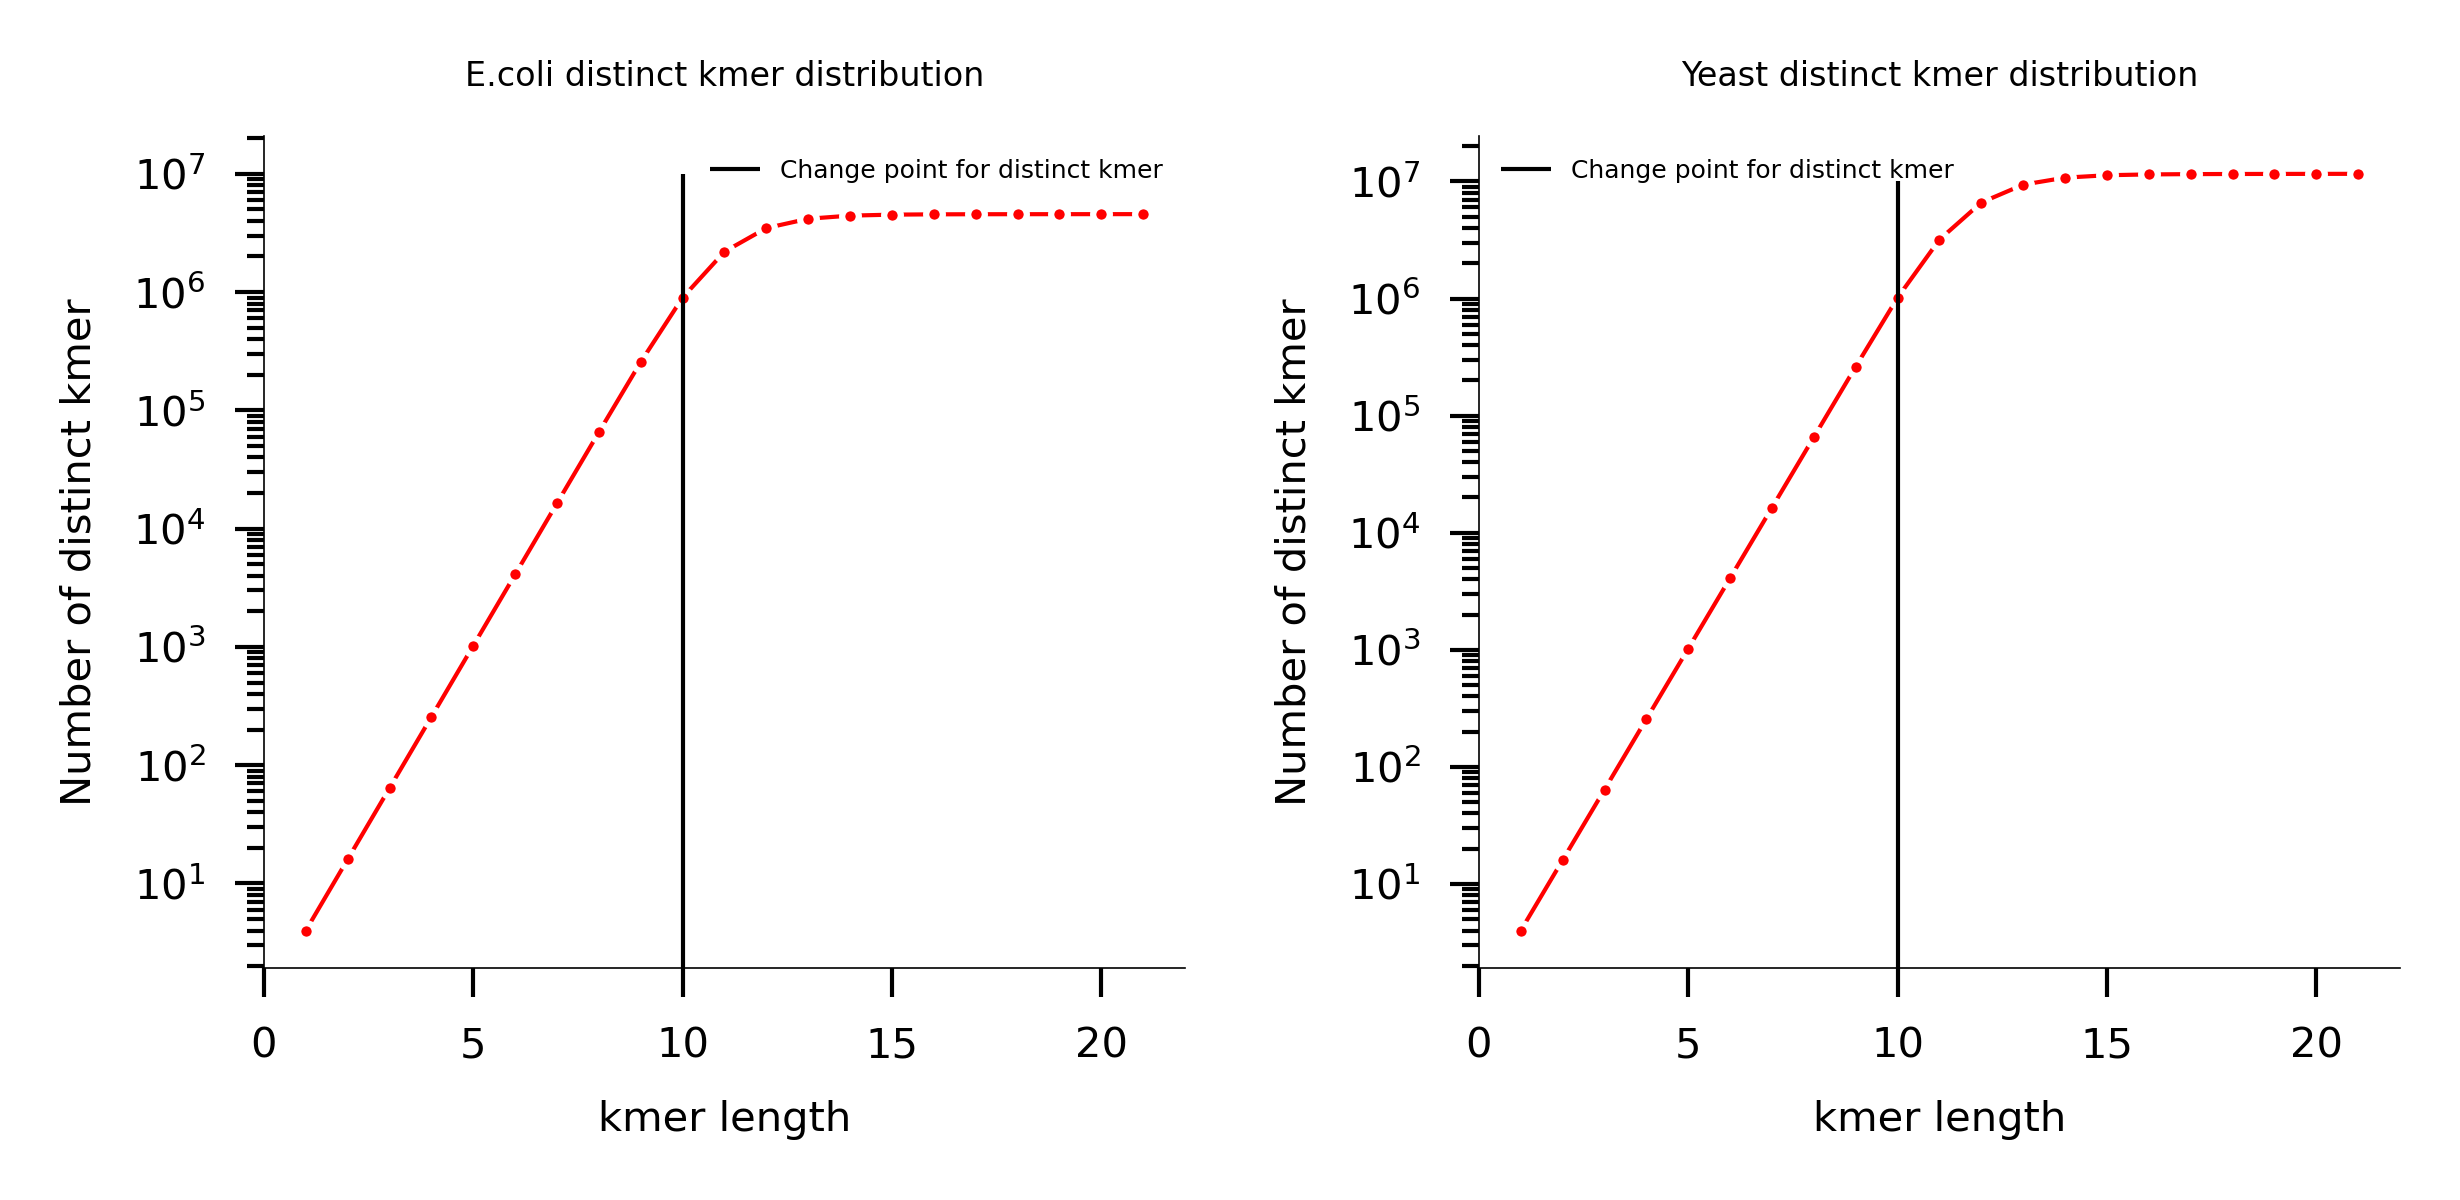

In [14]:

# Create the figure
fig, ax = plt.subplots(1, 2, figsize=(4.2, 2.1), dpi = 600)
ax[0] = return_plot(data = result_df_ecoli, ax = ax[0])
ax[0] = utility.custom_figure_axis(ax=ax[0], fontsize=5, show_ticks = True, rotation=0)

ax[1] = return_plot(data = result_df_yeast, ax = ax[1])
ax[1] = utility.custom_figure_axis(ax=ax[1], fontsize=5, show_ticks = True, rotation=0)

ax[0].set_title("E.coli distinct kmer distribution", fontsize=4)
ax[1].set_title("Yeast distinct kmer distribution", fontsize=4)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.tight_layout()

# plt.savefig("kmer.pdf",dpi =600)

"